<a href="https://colab.research.google.com/github/nycerik/Data201-Captstone/blob/main/ER_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import timeit
import io

In [ ]:
#Import data set from NYC Open Data

In [23]:
df=pd.read_csv('/content/NYPD_Arrests_Data__Historic__20240104.csv')

In [24]:
#verify number of rows/columns
df.shape

(5498650, 19)

In [25]:
#obtain correct column header names
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [26]:
#identify missing data
df.isnull().sum()

ARREST_KEY               0
ARREST_DATE              0
PD_CD                  874
PD_DESC               9169
KY_CD                 9739
OFNS_DESC             9169
LAW_CODE               196
LAW_CAT_CD           22001
ARREST_BORO              8
ARREST_PRECINCT          0
JURISDICTION_CODE       10
AGE_GROUP               17
PERP_SEX                 0
PERP_RACE                0
X_COORD_CD               1
Y_COORD_CD               1
Latitude                 1
Longitude                1
Lon_Lat                  1
dtype: int64

In [28]:
#obtain police arrest codes to filter by
df.PD_DESC.unique()

array([nan, 'RAPE 3', 'CHILD, ENDANGERING WELFARE',
       'CONTROLLED SUBSTANCE, POSSESSION 7', 'SEXUAL ABUSE',
       'ARSON 2,3,4', 'FORGERY,ETC.,UNCLASSIFIED-FELO', 'ASSAULT 3',
       'STRANGULATION 1ST', 'RAPE 1', 'TRESPASS 3, CRIMINAL',
       'FACILITATION 4, CRIMINAL', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'SEXUAL ABUSE 3,2', 'PROSTITUTION', 'SEXUAL ABUSE 1', 'SODOMY 1',
       'WEAPONS POSSESSION 3', 'RIOT 1', 'MARIJUANA, POSSESSION 1, 2 & 3',
       'SODOMY 2', 'MARIJUANA, SALE 4 & 5', 'RAPE 2',
       'IMPERSONATION 2, PUBLIC SERVANT',
       'CONTROLLED SUBSTANCE,INTENT TO', 'ASSAULT 2,1,UNCLASSIFIED',
       'SODOMY 3', 'STOLEN PROPERTY 3,POSSESSION',
       'RECKLESS ENDANGERMENT 1', 'FORGERY,ETC.,UNCLASSIFIED-FELONY',
       'LARCENY,PETIT FROM OPEN AREAS,', 'MARIJUANA, POSSESSION 4 & 5',
       'BURGLARY,RESIDENCE,NIGHT', 'WEAPONS POSSESSION 1 & 2',
       'TRESPASS 2, CRIMINAL', 'ROBBERY,UNCLASSIFIED,OPEN AREAS',
       'FORGERY,ETC.-MISD.', 'WEAPONS, POSSESSION, E

In [31]:
#clean data by dropping unnecssary columns
df2 = df.drop(['PD_CD', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD','ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat', 'LAW_CODE'], axis=1)

In [32]:
#confirm remaining columns
df2.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
0,236791704,11/22/2021,NaN,M,M,BLACK
1,237354740,12/04/2021,RAPE 3,B,M,WHITE HISPANIC
2,236081433,11/09/2021,"CHILD, ENDANGERING WELFARE",Q,M,BLACK
3,32311380,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",Q,M,BLACK
4,192799737,01/26/2019,SEXUAL ABUSE,M,M,BLACK


In [33]:
#confirm what is missing
df2.isnull().sum()

ARREST_KEY        0
ARREST_DATE       0
PD_DESC        9169
ARREST_BORO       8
PERP_SEX          0
PERP_RACE         0
dtype: int64

In [35]:
#replace missing police arrest description with unknown
df2.PD_DESC = df2.PD_DESC.fillna('UNKNOWN')

In [36]:
df2.isnull().sum()

ARREST_KEY     0
ARREST_DATE    0
PD_DESC        0
ARREST_BORO    8
PERP_SEX       0
PERP_RACE      0
dtype: int64

In [49]:
#assign datetime value to arrest date field so that it can be sorted
df2['ARREST_DATE'] = pd.to_datetime(df2['ARREST_DATE'])

In [50]:
#verify value of column data
print(type(df2.ARREST_DATE[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [51]:
#sort by arrest description of interest
df3=df2[df2['PD_DESC'].str.contains('IDENTITY THFT')]
df3.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
173,23873406,2006-08-15,IDENTITY THFT-1,K,F,ASIAN / PACIFIC ISLANDER
34100,173804402,2018-01-19,IDENTITY THFT-1,M,M,WHITE
74844,178405678,2018-04-20,IDENTITY THFT-1,M,M,WHITE HISPANIC
87631,175703702,2018-03-09,IDENTITY THFT-1,Q,M,WHITE
304866,164131025,2017-04-25,IDENTITY THFT-1,K,M,BLACK


In [52]:
#sort be descending date - data was last updated April 2023 yet this arrest code stops in 2018. Manhattan DA/State penal law still shows on books
df3.sort_values(by='ARREST_DATE',ascending=False)

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
634281,191459933,2018-12-23,IDENTITY THFT-1,Q,M,WHITE HISPANIC
639151,191287255,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
648453,191287257,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
638768,191287259,2018-12-18,IDENTITY THFT-1,Q,M,BLACK
628705,191121951,2018-12-13,IDENTITY THFT-2,K,M,WHITE
...,...,...,...,...,...,...
938229,10004494,2006-01-06,IDENTITY THFT-1,Q,M,BLACK
944811,9961265,2006-01-05,IDENTITY THFT-1,M,M,WHITE HISPANIC
937110,9958588,2006-01-04,IDENTITY THFT-2,K,F,WHITE HISPANIC
938581,9943990,2006-01-03,IDENTITY THFT-1,K,F,BLACK


In [55]:
#identify boro abbreviations to change
df.ARREST_BORO.unique()

array(['M', 'B', 'Q', 'K', 'S', nan], dtype=object)

In [87]:
 #repalce boro abbreviations with full boro name
 df3.replace({'ARREST_BORO' : {'K':'KINGS', 'M':'MANHATTAN', 'B':'BRONX', 'S' : 'STATEN ISLAND', "Q" : 'QUEENS' }})

,ARREST_KEY,ARREST_DATE,PD_DESC,ARREST_BORO,PERP_SEX,PERP_RACE
173,23873406,2006-08-15,IDENTITY THFT-1,KINGS,F,ASIAN / PACIFIC ISLANDER
34100,173804402,2018-01-19,IDENTITY THFT-1,MANHATTAN,M,WHITE
74844,178405678,2018-04-20,IDENTITY THFT-1,MANHATTAN,M,WHITE HISPANIC
87631,175703702,2018-03-09,IDENTITY THFT-1,QUEENS,M,WHITE
304866,164131025,2017-04-25,IDENTITY THFT-1,KINGS,M,BLACK
...,...,...,...,...,...,...
5303343,24188156,2006-09-07,IDENTITY THFT-1,KINGS,F,BLACK
5303731,24534819,2006-09-28,IDENTITY THFT-2,QUEENS,M,BLACK
5304934,24660442,2006-10-06,IDENTITY THFT-1,KINGS,M,BLACK
5305004,24321809,2006-09-15,IDENTITY THFT-1,MANHATTAN,F,BLACK


<Axes: xlabel='ARREST_BORO'>

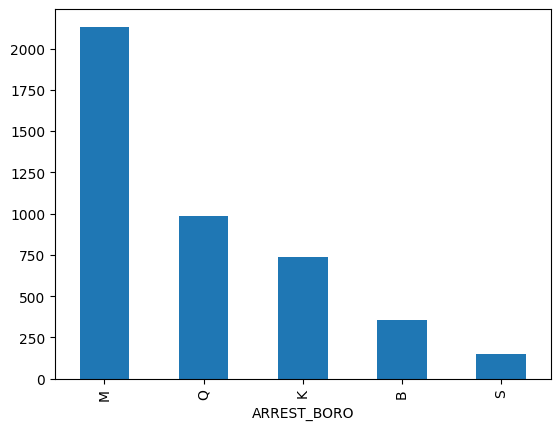

In [66]:
#visualize arrest data by boro with supporting group by numbers
df3.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

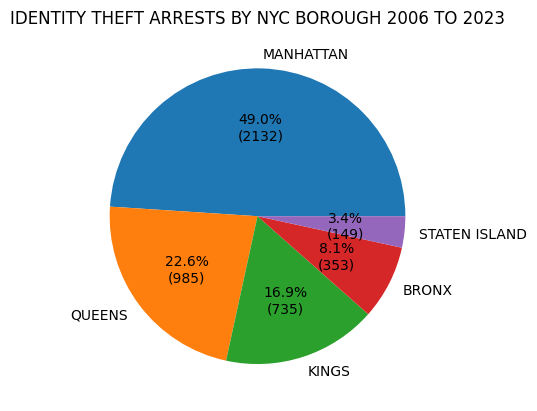

In [102]:
values=[2132, 985, 735, 353, 149  ]
labels=['MANHATTAN', 'QUEENS', 'KINGS', 'BRONX', 'STATEN ISLAND']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))

plt.title('IDENTITY THEFT ARRESTS BY NYC BOROUGH 2006 TO 2023')

plt.show()

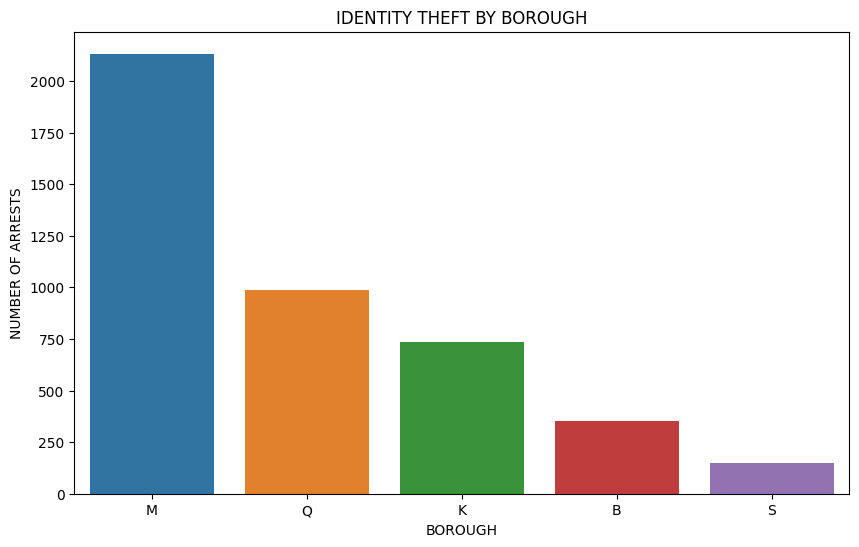

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ARREST_BORO', data=df3, order=df3['ARREST_BORO'].value_counts().index)
plt.title('IDENTITY THEFT BY BOROUGH')
plt.xlabel('BOROUGH')
plt.ylabel('NUMBER OF ARRESTS')
plt.show()

In [88]:
df3.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=False)

ARREST_BORO
M    2132
Q     985
K     735
B     353
S     149
Name: ARREST_BORO, dtype: int64

<Axes: xlabel='PERP_RACE'>

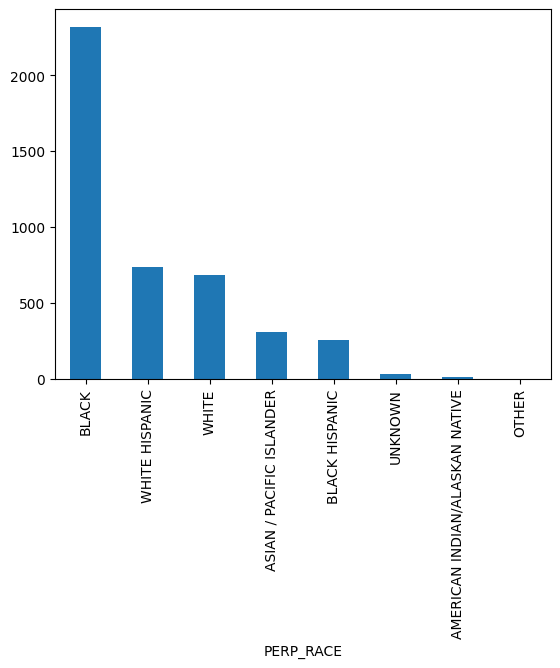

In [69]:
#visualize arrest data by perp race with supporting group by numbers
df3.groupby(['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

In [70]:
df3.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             2319
WHITE HISPANIC                     736
WHITE                              685
ASIAN / PACIFIC ISLANDER           309
BLACK HISPANIC                     259
UNKNOWN                             32
AMERICAN INDIAN/ALASKAN NATIVE      12
OTHER                                2
Name: PERP_RACE, dtype: int64

<Axes: xlabel='PERP_SEX'>

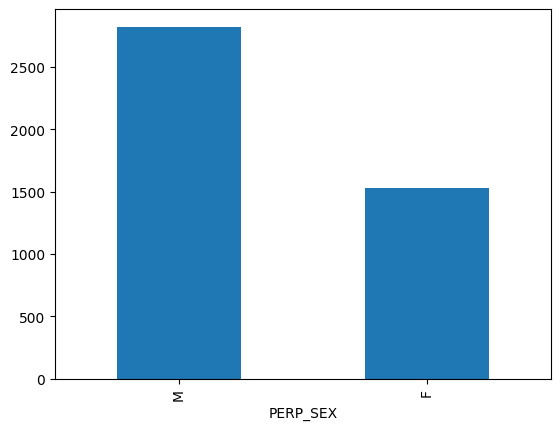

In [71]:
#visualize arrest data by perp sex with supporting group by numbers
df3.groupby(['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False).plot(kind='bar')

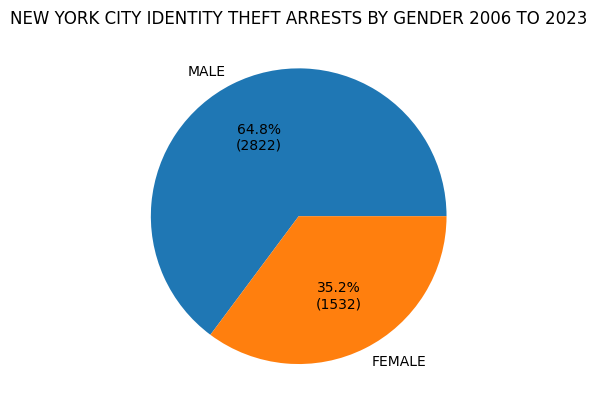

In [77]:
values=[2822, 1532 ]
labels=['MALE', 'FEMALE']

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(values, labels=labels, autopct=lambda pct: func(pct, values))

plt.title('NEW YORK CITY IDENTITY THEFT ARRESTS BY GENDER 2006 TO 2023')

plt.show()

In [89]:
df3.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    2822
F    1532
Name: PERP_SEX, dtype: int64

Conclusion:
NYPD Historical Arrest Data covers a period from 2006 to April 2023 and Identity Theft arrest numbers were were reviewed to see if they correlate with the national averages.  The records stop in 2018 and no information could be located exlaining why they were no longer reported; however, the New York State Attorney General and Manhattan District Attorney's Offices both have Idenity Theft victim support links on their websites.

Identity Theft Arrests in Manhattan reprented almost half of NYC's arrests - 49% and black males were arrested at a rate almost three times that of other races.